In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
import pathlib

In [4]:
nb_path = pathlib.Path().resolve()
data_dir = nb_path.parent / 'data'

In [5]:
df = pd.read_csv(data_dir/'asrc_test.csv',skiprows=[0,2])

In [6]:
df

,DATE initial_value,DOY initial_value,TA initial_value,FCO2_DRY LIN,FCO2_DRY LIN_R2,FCO2_DRY LIN_CV,COMMENT,FCO2_DRY,FCO2_DRY R2
0,2022-07-08 09:19:34,189.38859,28.94091,11.97104,0.99844,1.24936,ASRC_Rtest_1,12.78078,0.99854
1,2022-07-08 09:22:01,189.39029,28.16909,10.89139,0.99890,1.22718,ASRC_Rtest_2,10.89139,0.99890
2,2022-07-08 09:24:14,189.39183,28.22682,11.12598,0.99901,1.15525,ASRC_Rtest_3,11.12598,0.99901
3,2022-07-08 09:29:28,189.39546,-87.78409,-0.76028,0.84287,8.09856,ASRC_NEE_1,-0.76028,0.84287
4,2022-07-08 09:33:06,189.39799,-87.35273,-5.09084,0.99098,2.10711,ASRC_NEE_2,-5.09084,0.99098
5,2022-07-08 09:35:49,189.39987,-86.63273,-13.45906,0.99826,1.33588,ASRC_NEE_3,-13.45906,0.99826
6,2022-07-08 09:38:08,189.40148,-88.82318,-12.56667,0.99906,1.29117,ASRC_NEE_4,-12.62600,0.99914
7,2022-07-08 09:40:57,189.40344,-88.02000,18.74382,0.99965,1.17347,ASRC_RTEST_4,18.74382,0.99965
8,2022-07-08 09:43:55,189.40550,-86.36591,19.30822,0.99961,1.18276,ASRC_RTEST_5,21.44978,0.99976
9,2022-07-08 09:46:10,189.40706,-88.18864,18.07470,0.99947,1.19999,ASRC_RTEST_5,21.48356,0.99974


In [9]:
# add chamber column and set to 'opaque', 'clear', or 'covered' based on 'TA initial_value' column (which is negative for all clear chamber measurements)
df['chamber'] = 'clear'
df.loc[df['TA initial_value'] > 0, 'chamber'] = 'opaque'
df.loc[(df['TA initial_value'] < 0) & (df['FCO2_DRY LIN'] > 0), 'chamber'] = 'covered'

In [10]:
df

,DATE initial_value,DOY initial_value,TA initial_value,FCO2_DRY LIN,FCO2_DRY LIN_R2,FCO2_DRY LIN_CV,COMMENT,FCO2_DRY,FCO2_DRY R2,chamber
0,2022-07-08 09:19:34,189.38859,28.94091,11.97104,0.99844,1.24936,ASRC_Rtest_1,12.78078,0.99854,opaque
1,2022-07-08 09:22:01,189.39029,28.16909,10.89139,0.99890,1.22718,ASRC_Rtest_2,10.89139,0.99890,opaque
2,2022-07-08 09:24:14,189.39183,28.22682,11.12598,0.99901,1.15525,ASRC_Rtest_3,11.12598,0.99901,opaque
3,2022-07-08 09:29:28,189.39546,-87.78409,-0.76028,0.84287,8.09856,ASRC_NEE_1,-0.76028,0.84287,clear
4,2022-07-08 09:33:06,189.39799,-87.35273,-5.09084,0.99098,2.10711,ASRC_NEE_2,-5.09084,0.99098,clear
5,2022-07-08 09:35:49,189.39987,-86.63273,-13.45906,0.99826,1.33588,ASRC_NEE_3,-13.45906,0.99826,clear
6,2022-07-08 09:38:08,189.40148,-88.82318,-12.56667,0.99906,1.29117,ASRC_NEE_4,-12.62600,0.99914,clear
7,2022-07-08 09:40:57,189.40344,-88.02000,18.74382,0.99965,1.17347,ASRC_RTEST_4,18.74382,0.99965,covered
8,2022-07-08 09:43:55,189.40550,-86.36591,19.30822,0.99961,1.18276,ASRC_RTEST_5,21.44978,0.99976,covered
9,2022-07-08 09:46:10,189.40706,-88.18864,18.07470,0.99947,1.19999,ASRC_RTEST_5,21.48356,0.99974,covered


In [11]:
df.iloc[9,6] = 'ASRC_RTEST_6'    # fix label for last clear chamber test

In [12]:
# group based on chamber

grouped = df.groupby('chamber')
opaque = grouped.get_group('opaque')
clear = grouped.get_group('clear')
covered = grouped.get_group('covered')

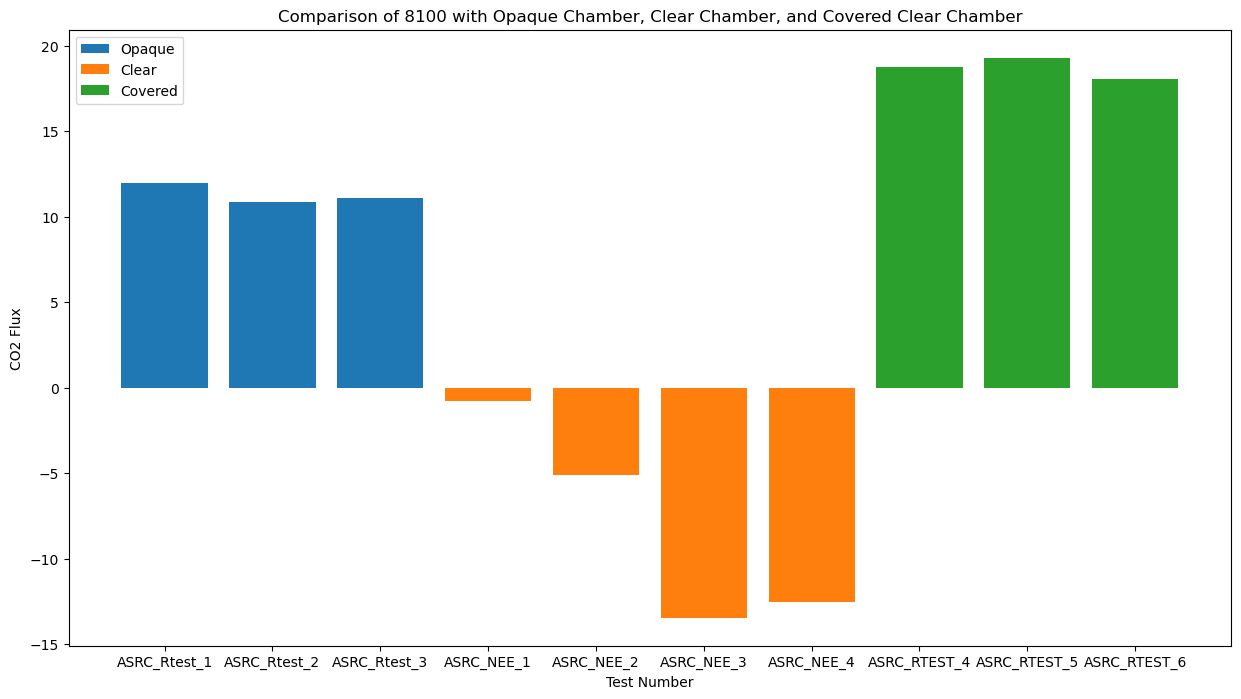

In [15]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(opaque['COMMENT'],opaque['FCO2_DRY LIN'])
ax.bar(clear['COMMENT'],clear['FCO2_DRY LIN'])
ax.bar(covered['COMMENT'],covered['FCO2_DRY LIN'])
ax.set_ylabel('CO2 Flux')
ax.set_xlabel('Test Number')
ax.set_title('Comparison of 8100 with Opaque Chamber, Clear Chamber, and Covered Clear Chamber')
plt.legend(['Opaque','Clear','Covered'])

plt.show()